# <font color='dark'>**Classificação: Validação de modelos e métricas de avaliação**</h1>

### Projeto

Uma empresa de empréstimo de automóveis está passando por uma situação complicada, com alta demanda para uma frota reduzida de veículos e alto número de inadimplentes, trazendo um prejuízo grande para a empresa.

Nós fomos contratados para buscar melhorias na identificação de inadimplentes. A análise dos clientes atualmente é feita de forma manual, cliente por cliente, tomando muito tempo e ainda assim a detecção de inadimplentes é muito imprecisa.

Nossa tarefa é utilizar os dados fornecidos pela empresa para **classificar** os clientes em adimplentes e inadimplentes.

## <font color='dark'>Classificando dados</h1>

### Criando um modelo inicial

In [1]:
import pandas as pd

In [2]:
dados = pd.read_csv('/content/emp_automovel.csv')

In [3]:
dados.head()

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.0,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.0,0
1,9000.0,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.0,0
2,15750.0,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.0,0
3,9000.0,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.0,0
4,7650.0,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.0,0


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54025 entries, 0 to 54024
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   receita_cliente      54025 non-null  float64
 1   anuidade_emprestimo  54025 non-null  float64
 2   anos_casa_propria    54025 non-null  float64
 3   telefone_trab        54025 non-null  int64  
 4   avaliacao_cidade     54025 non-null  float64
 5   score_1              54025 non-null  float64
 6   score_2              54025 non-null  float64
 7   score_3              54025 non-null  float64
 8   score_social         54025 non-null  float64
 9   troca_telefone       54025 non-null  float64
 10  inadimplente         54025 non-null  int64  
dtypes: float64(9), int64(2)
memory usage: 4.5 MB


In [5]:
x = dados.drop('inadimplente', axis =1)
y = dados['inadimplente']

In [6]:
from sklearn.tree import DecisionTreeClassifier

In [7]:
modelo = DecisionTreeClassifier()
modelo.fit(x, y)
modelo.score(x, y)

1.0

In [8]:
print(f'Acurácia: {modelo.score(x,y)}')

Acurácia: 1.0


## <font color='dark'>Validando o modelo</h1>

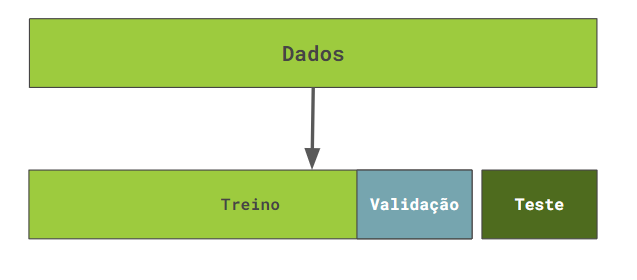

In [37]:
from sklearn.model_selection import train_test_split

In [27]:
x, x_teste, y, y_teste = train_test_split(x, y, test_size=0.15, stratify= y, random_state=5)
x_treino, x_val, y_treino, y_val = train_test_split(x, y, stratify=y, random_state=5)

In [45]:
modelo = DecisionTreeClassifier()
modelo.fit(x_treino, y_treino)
print(f'Acurácia de treino: {modelo.score(x_treino, y_treino)}')
print(f'Acurácia de validação: {modelo.score(x_val, y_val)}')

Acurácia de treino: 1.0
Acurácia de validação: 0.8439716312056738


In [46]:
modelo = DecisionTreeClassifier(max_depth = 10)
modelo.fit(x_treino, y_treino)
print(f'Acurácia de treino: {modelo.score(x_treino, y_treino)}')
print(f'Acurácia de validação: {modelo.score(x_val, y_val)}')

Acurácia de treino: 0.924160756501182
Acurácia de validação: 0.9045390070921986


## Avaliando o modelo


In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
y_previsto = modelo.predict(x_val)
matriz_confusao = confusion_matrix(y_val, y_previsto)
print(matriz_confusao)

[[6362   72]
 [ 601   15]]


In [49]:
from sklearn.metrics import ConfusionMatrixDisplay

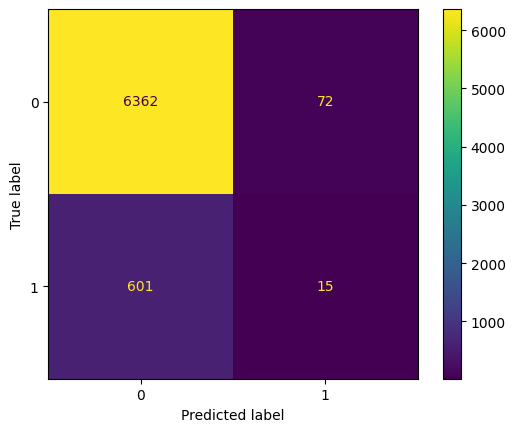

In [50]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao)
visualizacao.plot();

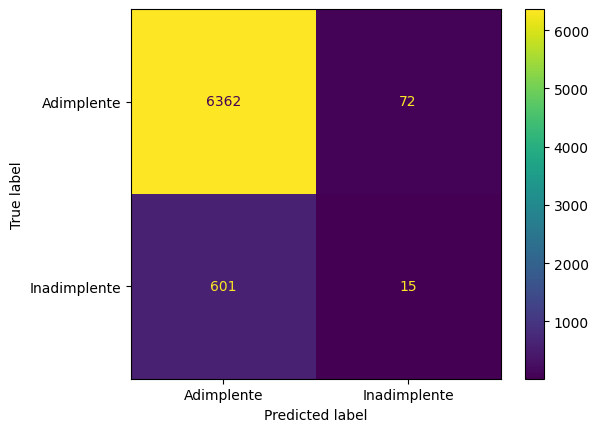

In [51]:
visualizacao = ConfusionMatrixDisplay(confusion_matrix=matriz_confusao, display_labels=['Adimplente', 'Inadimplente'])
visualizacao.plot();

Para entender o gráfico acima:

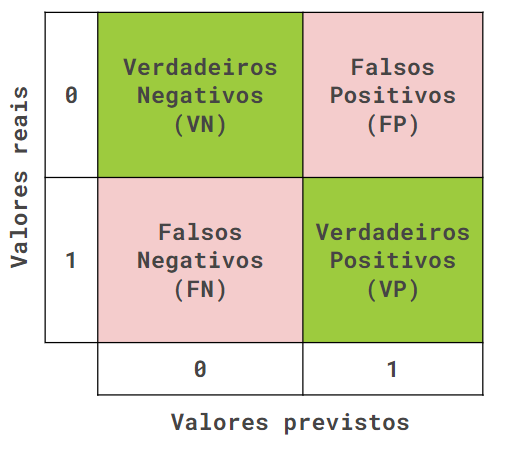

# Acurácia, precisão e recall



In [52]:
from sklearn.metrics import accuracy_score

In [53]:
print(f'Acurácia: {accuracy_score(y_val, y_previsto)}')

Acurácia: 0.9045390070921986


In [54]:
from sklearn.metrics import precision_score, recall_score

In [55]:
print(f'Precisão: {precision_score(y_val, y_previsto)}')
print(f'Recall: {recall_score(y_val, y_previsto)}')

Precisão: 0.1724137931034483
Recall: 0.024350649350649352


In [56]:
from sklearn.metrics import f1_score

In [57]:
print(f'F1-score: {f1_score(y_val, y_previsto)}')

F1-score: 0.042674253200568994


# Curva ROC
 usada para avaliar se nosso modelo consegue fazer uma distinção eficaz entre as classes, isto é, entre pessoas clientes que estão em dia com seus pagamentos e pessoas clientes que estão inadimplentes.

Essa curva ROC é construída usando a métrica recall e outra métrica derivada da matriz de confusão. Se voltarmos um pouco ao nosso projeto, a outra métrica usada para a construção da curva ROC é a taxa de falsos positivos.

Ela é calculada pela quantidade de falsos positivos, dividido pela soma de verdadeiros negativos e falsos positivos. Assim, vamos usar esta métrica e recall para a construção desse gráfico e a avaliação do nosso modelo será feita a partir dessas duas métricas.

In [58]:
from sklearn.metrics import RocCurveDisplay

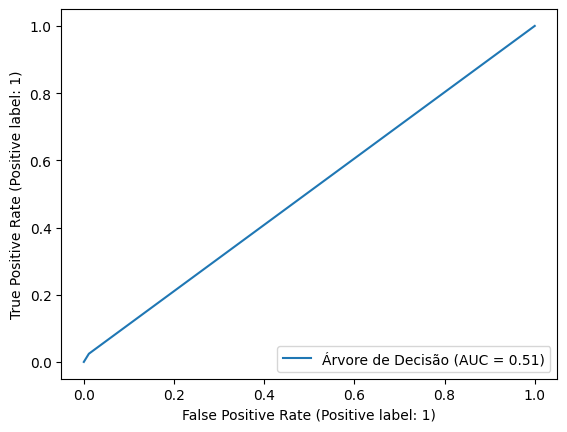

In [59]:
RocCurveDisplay.from_predictions(y_val, y_previsto, name = 'Árvore de Decisão');

In [60]:
from sklearn.metrics import roc_auc_score

In [61]:
print(f'AUC: {roc_auc_score(y_val, y_previsto)}')

AUC: 0.5065800495742988


# Curva de precisão x Recall

In [62]:
from sklearn.metrics import PrecisionRecallDisplay

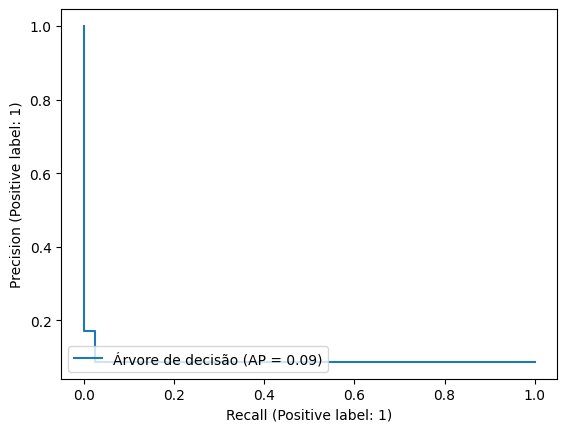

In [63]:
PrecisionRecallDisplay.from_predictions(y_val, y_previsto, name = 'Árvore de decisão');

In [64]:
from sklearn.metrics import average_precision_score

In [65]:
print(f'AP: {average_precision_score(y_val, y_previsto)}')

AP: 0.08944661476943208


# Relatório de métricas

In [66]:
from sklearn.metrics import classification_report

In [67]:
print(classification_report(y_val, y_previsto))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      6434
           1       0.17      0.02      0.04       616

    accuracy                           0.90      7050
   macro avg       0.54      0.51      0.50      7050
weighted avg       0.85      0.90      0.87      7050



# Usando o KFold
Criamos um modelo de classificação e, ao avaliar seu desempenho com a métrica de recall, a mais relevante para o nosso problema, encontramos um resultado insatisfatório de 0.04. Contudo, no processo de validação desse modelo, fizemos uma separação de dados entre treinamento e validação.

O potencial problema aqui é que, durante esse processo, ao ser realizada uma separação estratificada - mantendo a mesma proporção de dados de clientes inadimplentes e adimplentes em ambos os conjuntos de dados - pode ter ocorrido uma distribuição que gerou um padrão de dados no conjunto de treinamento e um padrão diferente no conjunto de validação.

Caso esses dois conjuntos apresentem padrões de dados muito distintos, no momento do treinamento do modelo, ele vai aprender um tipo de padrão e, ao avaliar o desempenho desse modelo nos dados de validação, não conseguirá ter um bom desempenho, porque os dados funcionam de uma maneira diferente, ou seja, têm um padrão diferente.

Para evitar esse tipo de problema, podemos utilizar uma estratégia mais confiável e segura: a validação cruzada. Em vez de utilizar um conjunto de dados para treinamento e outro para validação, dividiremos nosso conjunto de dados em mais partes.

Já fizemos uma separação do conjunto de dados de teste, então essa divisão não precisa ser realizada novamente. Vamos focar em utilizar aqueles dados XY, que é o conjunto das partes de validação e treinamento, e dividir esses dados em cinco partes.

Quantas partes podemos utilizar? Quanto mais partes utilizarmos, melhor será a mitigação do problema levantado. Porém, mais processamento será necessário, pois será gerado um modelo para cada uma das separações utilizadas.

A compreensão geral é que a partir de dez divisões não é tão necessário assim, porque com dez divisões já é suficiente para mitigar esse problema e não ter um processamento tão grande, logo é um valor de equilíbrio. No nosso caso, vamos utilizar uma divisão de dados em cinco partes, o que também é benéfico. É uma estratégia melhor do que fazer uma divisão entre treinamento e validação, pois vai evitar o problema mencionado.

Mas como funciona esse processo de validação cruzada? Dividimos os dados em cinco partes, uma das partes será usada como validação e as outras como treinamento. Então, será gerado um modelo a partir desses dados de treinamento e validação, no entanto, esse conjunto de dados de validação vai mudar da primeira para a segunda parte, gerando um novo modelo.

Esse modelo, então, vai usar a segunda parte como validação e todas as outras como treinamento. Este processo se repetirá até que cada parte da divisão seja utilizada pelo menos uma única vez para validação.

Este processo, no caso, irá gerar cinco modelos, porque fizemos a divisão em cinco partes e o desempenho do modelo será a média da métrica escolhida como resultado geral. Dessa forma, vamos amenizar um pouco o problema de dividir nossos dados de forma aleatória em duas partes.

Agora, vamos utilizar a validação cruzada com cinco partes, e um de seus métodos, conhecido como KFold. Existem diferentes estratégias dentro da validação cruzada, mas a mais simples é feita sem nenhum critério específico. Nós dividiremos simplesmente os dados em cinco partes, utilizando uma parte para validação e as demais para treinamento, de forma aleatória. O método KFold opera dessa maneira.

In [68]:
from sklearn.model_selection import cross_validate, KFold

In [69]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv = kf)
cv_resultados

{'fit_time': array([0.33308148, 0.21217537, 0.2283628 , 0.20317698, 0.1796155 ]),
 'score_time': array([0.00470257, 0.00497985, 0.00476265, 0.00480485, 0.00458574]),
 'test_score': array([0.90425532, 0.9072695 , 0.90177305, 0.90478723, 0.91507092])}

In [70]:
cv_resultados['test_score']

array([0.90425532, 0.9072695 , 0.90177305, 0.90478723, 0.91507092])

In [71]:
media = cv_resultados['test_score'].mean()
desvio_padrao = cv_resultados['test_score'].std()
print(f'Intervalo de confiança: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')

Intervalo de confiança: [0.8974974010446536, 0.9157650103028642]


# Validação cruzada com recall

Estamos usando o processo de validação cruzada para avaliar o desempenho do nosso modelo de classificação e obtivemos um intervalo de confiança de 0.89 a 0.91. Esse resultado é bem próximo da acurácia obtida pelo processo de validação simples, realizado na divisão entre os dados de treinamento e validação. Entretanto, apesar de serem resultados semelhantes, não significa que isso ocorrerá na maioria das vezes.

O processo de validação cruzada é importante para obter um resultado mais confiável, indicando que o nosso modelo terá um desempenho adequado quando aplicado a dados reais. No entanto, obtivemos um intervalo de confiança para a acurácia, quando a métrica que queremos avaliar é o recall. Essa métrica é mais importante para identificar se a empresa terá prejuízo ou não, isto é, se está conseguindo classificar adequadamente os clientes.

Vamos, então, aplicar o processo de validação cruzada utilizando o recall como métrica de desempenho. Primeiramente, no nosso código, vamos copiar o trecho que cria o intervalo de confiança e criar uma função para facilitar a extração desse intervalo.

In [74]:
def intervalo_conf():
    media = cv_resultados['test_score'].mean()
    desvio_padrao = cv_resultados['test_score'].std()
    print(f'Intervalo de confiança: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')

In [75]:
def intervalo_conf(resultados):
    media = resultados['test_score'].mean()
    desvio_padrao = resultados['test_score'].std()
    print(f'Intervalo de confiança: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')

In [76]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv = kf, scoring = 'recall')
cv_resultados

{'fit_time': array([0.32073545, 0.35989571, 0.25756121, 0.26448035, 0.28941703]),
 'score_time': array([0.00899029, 0.02440977, 0.0080061 , 0.00842166, 0.01548505]),
 'test_score': array([0.03992016, 0.02066116, 0.04069767, 0.04016064, 0.04103672])}

In [77]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.020641717781392364, 0.05234882252138879]


# Estratificando os dados

In [78]:
dados['inadimplente'].value_counts(normalize = True)

,proportion
inadimplente,
0,0.912707
1,0.087293


In [79]:
from sklearn.model_selection import StratifiedKFold

In [80]:
modelo = DecisionTreeClassifier(max_depth = 10)
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv = skf, scoring='recall')

In [81]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.01359129850249801, 0.0424732803988691]


# Oversampling


In [82]:
from imblearn.over_sampling import SMOTE

In [83]:
oversample = SMOTE()
x_balanceado, y_balanceado = oversample.fit_resample(x, y)

In [84]:
y_balanceado.value_counts(normalize = True)

,proportion
inadimplente,
0,0.5
1,0.5


In [85]:
modelo = DecisionTreeClassifier(max_depth = 10)
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x_balanceado, y_balanceado, cv=skf, scoring = 'recall')

In [86]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.7293791779194131, 0.7816928642581275]


# Pipeline para validação

In [87]:
from imblearn.pipeline import Pipeline as imbpipeline

In [88]:
modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbpipeline([('oversample', SMOTE()), ('arvore', modelo)])

In [89]:
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(pipeline, x, y, cv=skf, scoring = 'recall')

In [90]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.18604382319397536, 0.33954367000347174]


# Undersampling

In [91]:
from imblearn.under_sampling import NearMiss

In [92]:
modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbpipeline([('undersample', NearMiss(version=3)), ('arvore', modelo)])

In [93]:
modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbpipeline([('undersample', NearMiss(version=3)), ('arvore', modelo)])
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(pipeline, x, y, cv=skf, scoring = 'recall')

In [94]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.5552202883570069, 0.7486039831514283]


#Testando o modelo

In [95]:
undersample = NearMiss(version=3)
x_balanceado, y_balanceado = undersample.fit_resample(x, y)

In [96]:
modelo = DecisionTreeClassifier(max_depth = 10)
modelo.fit(x_balanceado, y_balanceado)
y_previsto = modelo.predict(x_teste)

In [97]:
print(classification_report(y_teste, y_previsto))

              precision    recall  f1-score   support

           0       0.93      0.45      0.61      4542
           1       0.10      0.64      0.17       435

    accuracy                           0.47      4977
   macro avg       0.51      0.55      0.39      4977
weighted avg       0.86      0.47      0.57      4977



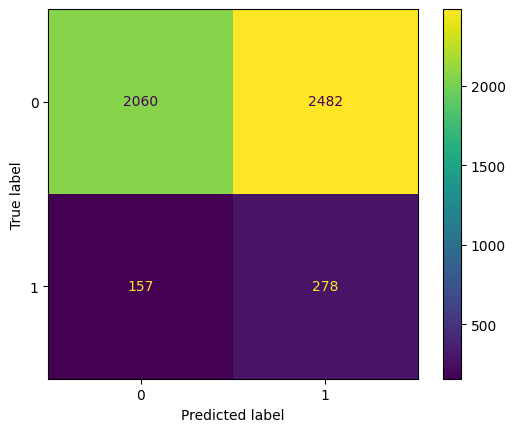

In [98]:
ConfusionMatrixDisplay.from_predictions(y_teste, y_previsto);

Com isso, temos um relatório das métricas. Note que, nos dados que representam situações semelhantes ao mundo real, que são desbalanceados e não foram utilizados na etapa de aprimoramento e comparação dos modelos, nós obtivemos um recall de 0.70. Agora, conseguimos identificar 494 clientes inadimplentes.

Essa etapa final de avaliação é crucial para compreender como nosso modelo se comportará com dados do mundo real. Por isso, foi importante separar os dados de teste desde o início do nosso projeto.

Utilizamos a estratégia de undersampling para aprimorar o resultado do nosso modelo, porém existem outras estratégias que podemos aplicar para melhorar seu desempenho.

Além disso, a empresa pode avaliar se o modelo construído será colocado em produção para identificar os clientes inadimplentes e evitar um prejuízo considerável.

 Discutir no Fórum

# O que aprendemos?

Nosso projeto foi focado em identificar clientes inadimplentes na empresa de empréstimo de automóveis. Executamos todas as etapas para encontrar um modelo capaz de realizar essa classificação.

Contudo, essa não é a única tarefa que pode ser realizada com a classificação em Machine Learning. Este exemplo serve para que você consiga aplicar os conceitos discutidos, mas em outros projetos. Por exemplo, na detecção de fraudes, na identificação de spams e previsão de churn de clientes.

Desde que você tenha dados e categorias que precisam ser previstas, a classificação com Machine Learning pode ser aplicada. O nosso foco foi nas etapas de validação e avaliação do desempenho do modelo.

Portanto, a partir do curso, você conseguirá avaliar o desempenho do modelo de classificação da forma mais correta possível, tanto a partir da métrica de desempenho que se encaixa melhor para cada tipo de problema, quanto para o tipo de validação que deve ser feito para entender como o modelo irá se sair em classificar dados do mundo real.